In [5]:
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import pylab
import numpy as np
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
%matplotlib inline


df = pd.read_csv('./winemag-data-130k-v2.csv', index_col=0)
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks


对数据集进行处理，去除数据中的缺失值

In [6]:
df =df.dropna()
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,87,19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,87,22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,87,69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,86,50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


关联规则挖掘

In [7]:
df.describe()

,points,price
count,22387.000000,22387.000000
mean,89.537812,41.465404
std,2.809306,29.379374
min,80.000000,4.000000
25%,88.000000,25.000000
50%,90.000000,36.000000
75%,92.000000,50.000000
max,100.000000,2013.000000


可以观察到，points数值分布在80到100之间，price取值为4到2013，现将这两个属性离散化，分为3个层次，低、中、高

对points进行处理，分别为：80-85,85-95，95-100

In [8]:
bin = [80,85,95,100]
df['points'] = pd.cut(df['points'],bin)
df['points'] = df['points'].astype('str')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(85.0, 95.0]",65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(85.0, 95.0]",19.0,California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(85.0, 95.0]",22.0,California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(85.0, 95.0]",69.0,California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(85.0, 95.0]",50.0,Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


对price进行处理，分别为：4-500,500-1500，1500-2013

In [9]:
bin = [4,500,1500,2013]
df['price'] = pd.cut(df['price'],bin)
df['price'] = df['price'].astype('str')
df.head()

,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,"(85.0, 95.0]","(4.0, 500.0]",Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
10,US,"Soft, supple plum envelopes an oaky structure ...",Mountain Cuvée,"(85.0, 95.0]","(4.0, 500.0]",California,Napa Valley,Napa,Virginie Boone,@vboone,Kirkland Signature 2011 Mountain Cuvée Caberne...,Cabernet Sauvignon,Kirkland Signature
23,US,This wine from the Geneseo district offers aro...,Signature Selection,"(85.0, 95.0]","(4.0, 500.0]",California,Paso Robles,Central Coast,Matt Kettmann,@mattkettmann,Bianchi 2011 Signature Selection Merlot (Paso ...,Merlot,Bianchi
25,US,Oak and earth intermingle around robust aromas...,King Ridge Vineyard,"(85.0, 95.0]","(4.0, 500.0]",California,Sonoma Coast,Sonoma,Virginie Boone,@vboone,Castello di Amorosa 2011 King Ridge Vineyard P...,Pinot Noir,Castello di Amorosa
35,US,As with many of the Erath 2010 vineyard design...,Hyland,"(85.0, 95.0]","(4.0, 500.0]",Oregon,McMinnville,Willamette Valley,Paul Gregutt,@paulgwine,Erath 2010 Hyland Pinot Noir (McMinnville),Pinot Noir,Erath


进行挖掘的数据集如下所示：

In [10]:
df = df[['points','price','country','winery']]
df.head(20)

,points,price,country,winery
4,"(85.0, 95.0]","(4.0, 500.0]",US,Sweet Cheeks
10,"(85.0, 95.0]","(4.0, 500.0]",US,Kirkland Signature
23,"(85.0, 95.0]","(4.0, 500.0]",US,Bianchi
25,"(85.0, 95.0]","(4.0, 500.0]",US,Castello di Amorosa
35,"(85.0, 95.0]","(4.0, 500.0]",US,Erath
60,"(85.0, 95.0]","(4.0, 500.0]",US,Okapi
62,"(85.0, 95.0]","(4.0, 500.0]",US,Ram
64,"(85.0, 95.0]","(4.0, 500.0]",US,Sevtap
67,"(85.0, 95.0]","(4.0, 500.0]",US,Basel Cellars
71,"(85.0, 95.0]","(4.0, 500.0]",US,Eco Terreno


生成频繁集

In [11]:
def apriori(data_set):
    # 候选项1项集
    c1 = set()
    for items in data_set:
        for item in items:
            item_set = frozenset([item])
            c1.add(item_set)
def generate_freq_supports(data_set, item_set, min_support):
    freq_set = set()  
    item_count = {}  
    supports = {}  
    for record in data_set:
        for item in item_set:
            if item.issubset(record):
                if item not in item_count:
                    item_count[item] = 1
                else:
                    item_count[item] += 1

    data_len = float(len(data_set))
    for item in item_count:
        if (item_count[item] / data_len) >= min_support:
            freq_set.add(item)
            supports[item] = item_count[item] / data_len

    return freq_set, supports

In [12]:
def generate_new_combinations(freq_set, k):
    new_combinations = set() 
    sets_len = len(freq_set)  
    freq_set_list = list(freq_set)  

    for i in range(sets_len):
        for j in range(i + 1, sets_len):
            l1 = list(freq_set_list[i])
            l2 = list(freq_set_list[j])
            l1.sort()
            l2.sort()
            if l1[0:k-2] == l2[0:k-2]:
                freq_item = freq_set_list[i] | freq_set_list[j]
                new_combinations.add(freq_item)

    return new_combinations

In [13]:
def apriori(data_set, min_support, max_len=None):
    max_items = 2  
    freq_sets = []  
    supports = {}  
    c1 = set()
    for items in data_set:
        for item in items:
            item_set = frozenset([item])
            c1.add(item_set)

    l1, support1 = generate_freq_supports(data_set, c1, min_support)

    freq_sets.append(l1)
    supports.update(support1)

    if max_len is None:
        max_len = float('inf')

    while max_items and max_items <= max_len:
        ci = generate_new_combinations(freq_sets[-1], max_items)  
        li, support = generate_freq_supports(data_set, ci, min_support)  
        if li:
            freq_sets.append(li)
            supports.update(support)
            max_items += 1
        else:
            max_items = 0

    return freq_sets, supports

In [14]:
newData = list(map(set,np.array(df)))
L, suppData = apriori(newData, min_support=0.5)
L

[{frozenset({'(4.0, 500.0]'}), frozenset({'US'}), frozenset({'(85.0, 95.0]'})},
 {frozenset({'(4.0, 500.0]', 'US'}),
  frozenset({'(85.0, 95.0]', 'US'}),
  frozenset({'(4.0, 500.0]', '(85.0, 95.0]'})},
 {frozenset({'(4.0, 500.0]', '(85.0, 95.0]', 'US'})}]

遍历suppData

In [15]:
for tmp, num in suppData.items():
    print(tmp, ':', num)

frozenset({'US', '(4.0, 500.0]'}) : 0.9998213248760441
frozenset({'(4.0, 500.0]'}) : 0.9998213248760441
frozenset({'(85.0, 95.0]', 'US'}) : 0.9131192209764596
frozenset({'US'}) : 1.0
frozenset({'(85.0, 95.0]', 'US', '(4.0, 500.0]'}) : 0.9129852146334927
frozenset({'(85.0, 95.0]', '(4.0, 500.0]'}) : 0.9129852146334927
frozenset({'(85.0, 95.0]'}) : 0.9131192209764596


置信度计算

In [16]:
confList = []
for itemSet in L:
    for record in itemSet:
        if(len(record)>1): 
            for i in record: 
                tar = suppData[frozenset([i])]
                bset = record - frozenset([i])
                aset = suppData[record]
                ret = suppData.get(bset)
                try:
                    if suppData.get(bset):
                        con = aset/ret
                        print(frozenset([i]),record,con)
                        confList.append([frozenset([i]),record,con])
                except TypeError as e:
                    print(e)

frozenset({'US'}) frozenset({'US', '(4.0, 500.0]'}) 1.0
frozenset({'(4.0, 500.0]'}) frozenset({'US', '(4.0, 500.0]'}) 0.9998213248760441
frozenset({'(85.0, 95.0]'}) frozenset({'(85.0, 95.0]', 'US'}) 0.9131192209764596
frozenset({'US'}) frozenset({'(85.0, 95.0]', 'US'}) 1.0
frozenset({'(85.0, 95.0]'}) frozenset({'(85.0, 95.0]', '(4.0, 500.0]'}) 0.9131483715319663
frozenset({'(4.0, 500.0]'}) frozenset({'(85.0, 95.0]', '(4.0, 500.0]'}) 0.9998532433225712
frozenset({'(85.0, 95.0]'}) frozenset({'(85.0, 95.0]', 'US', '(4.0, 500.0]'}) 0.9131483715319663
frozenset({'US'}) frozenset({'(85.0, 95.0]', 'US', '(4.0, 500.0]'}) 1.0
frozenset({'(4.0, 500.0]'}) frozenset({'(85.0, 95.0]', 'US', '(4.0, 500.0]'}) 0.9998532433225712


生成关联规则

In [27]:
def association_rules(freq_sets, supports, min_conf):
    rules = []
    max_len = len(freq_sets)

 #生成关联规则，筛选符合规则的频繁集计算置信度，满足最小置信度的关联规则添加到列表
    for k in range(max_len - 1):
        for freq_set in freq_sets[k]:
            for sub_set in freq_sets[k + 1]:
                if freq_set.issubset(sub_set):
                    conf = supports[sub_set] / supports[freq_set]
                    rule = (freq_set, sub_set - freq_set, conf)
                    if conf >= min_conf:
                        rules.append(rule)
    return rules

In [28]:
association_rules = association_rules(L, suppData, min_conf=0.05)
association_rules

[(frozenset({'(4.0, 500.0]'}), frozenset({'US'}), 1.0),
 (frozenset({'(4.0, 500.0]'}),
  frozenset({'(85.0, 95.0]'}),
  0.9131483715319663),
 (frozenset({'US'}), frozenset({'(4.0, 500.0]'}), 0.9998213248760441),
 (frozenset({'US'}), frozenset({'(85.0, 95.0]'}), 0.9131192209764596),
 (frozenset({'(85.0, 95.0]'}), frozenset({'US'}), 1.0),
 (frozenset({'(85.0, 95.0]'}),
  frozenset({'(4.0, 500.0]'}),
  0.9998532433225712),
 (frozenset({'(4.0, 500.0]', 'US'}),
  frozenset({'(85.0, 95.0]'}),
  0.9131483715319663),
 (frozenset({'(85.0, 95.0]', 'US'}),
  frozenset({'(4.0, 500.0]'}),
  0.9998532433225712),
 (frozenset({'(4.0, 500.0]', '(85.0, 95.0]'}), frozenset({'US'}), 1.0)]

关联规则的评价

Lift（提升度）：指A项和B项一同出现的频率，但同时要考虑这两项各自出现的频率。
提升度反映了关联规则中的A与B的相关性，提升度>1且越高表明正相关性越高，提升度<1且越低表明负相关性越高，提升度=1表明没有相关性。

In [29]:
def liftCheck(conList,suppData):
    liftList_true=[]
    liftList_no=[]
    liftList_false=[]
    for item in confList:
        score = suppData.get(item[1])/(suppData.get(item[0])*suppData.get(item[1]-item[0]))
        if score>1:
            liftList_true.append(item)
        if score<1:
            liftList_false.append(item)
        if score ==1:
            liftList_no.append(item)
    return liftList_true,liftList_no,liftList_false

In [30]:
yes,no,false = liftCheck(L,suppData)

In [31]:
yes

[[frozenset({'(85.0, 95.0]'}),
  frozenset({'(4.0, 500.0]', '(85.0, 95.0]'}),
  0.9131483715319663],
 [frozenset({'(4.0, 500.0]'}),
  frozenset({'(4.0, 500.0]', '(85.0, 95.0]'}),
  0.9998532433225712],
 [frozenset({'(85.0, 95.0]'}),
  frozenset({'(4.0, 500.0]', '(85.0, 95.0]', 'US'}),
  0.9131483715319663],
 [frozenset({'(4.0, 500.0]'}),
  frozenset({'(4.0, 500.0]', '(85.0, 95.0]', 'US'}),
  0.9998532433225712]]

全自信度

In [32]:
def all_confidence(L,suppData):
    result = []
    for item in confList:
        score = suppData.get(item[1])/max(suppData.get(item[0]),suppData.get(item[1]-item[0]))
        result.append(['全自信度为:{0}'.format(score),item])
    return result

In [33]:
conf = all_confidence(confList,suppData)
conf

[['全自信度为:0.9998213248760441',
  [frozenset({'US'}), frozenset({'(4.0, 500.0]', 'US'}), 1.0]],
 ['全自信度为:0.9998213248760441',
  [frozenset({'(4.0, 500.0]'}),
   frozenset({'(4.0, 500.0]', 'US'}),
   0.9998213248760441]],
 ['全自信度为:0.9131192209764596',
  [frozenset({'(85.0, 95.0]'}),
   frozenset({'(85.0, 95.0]', 'US'}),
   0.9131192209764596]],
 ['全自信度为:0.9131192209764596',
  [frozenset({'US'}), frozenset({'(85.0, 95.0]', 'US'}), 1.0]],
 ['全自信度为:0.9131483715319663',
  [frozenset({'(85.0, 95.0]'}),
   frozenset({'(4.0, 500.0]', '(85.0, 95.0]'}),
   0.9131483715319663]],
 ['全自信度为:0.9131483715319663',
  [frozenset({'(4.0, 500.0]'}),
   frozenset({'(4.0, 500.0]', '(85.0, 95.0]'}),
   0.9998532433225712]],
 ['全自信度为:0.9131483715319663',
  [frozenset({'(85.0, 95.0]'}),
   frozenset({'(4.0, 500.0]', '(85.0, 95.0]', 'US'}),
   0.9131483715319663]],
 ['全自信度为:0.9129852146334927',
  [frozenset({'US'}), frozenset({'(4.0, 500.0]', '(85.0, 95.0]', 'US'}), 1.0]],
 ['全自信度为:0.9131483715319663',
  [frozense

实验结果分析

葡萄酒的产地、品种和打分之间有着密切的关系

可视化

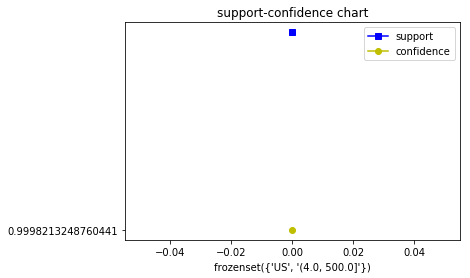

In [34]:
item = conf[0]
support = item[1][2]
confidence = item[0].split(':')[1]
k1 = support 
k2 = confidence  
plt.plot( k1, 's-', color = 'b', label="support")  
plt.plot( k2, 'o-', color = 'y', label="confidence")  
plt.xlabel(item[1][1]) 
plt.legend(loc="best") 
plt.title("support-confidence chart")
plt.show()